Importing the required libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.neighbors import NearestNeighbors

Load Dataset

In [3]:
df = pd.read_csv('spotify dataset.csv')

 Data Preprocessing

In [5]:
# Drop irrelevant columns
columns_to_drop = ['track_id', 'track_uri', 'artist_uri', 'album_uri']
df.drop(columns=columns_to_drop, axis=1, inplace=True, errors='ignore')

# Handle missing values
df.dropna(inplace=True)

# Encode playlist genre
le = LabelEncoder()
df['playlist_genre_encoded'] = le.fit_transform(df['playlist_genre'])

# Select only numeric audio features manually
numeric_feature_cols = [
    'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
    'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
    'duration_ms'
]
features = df[numeric_feature_cols]

# Normalize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

Exploratory Data Analysis (EDA)

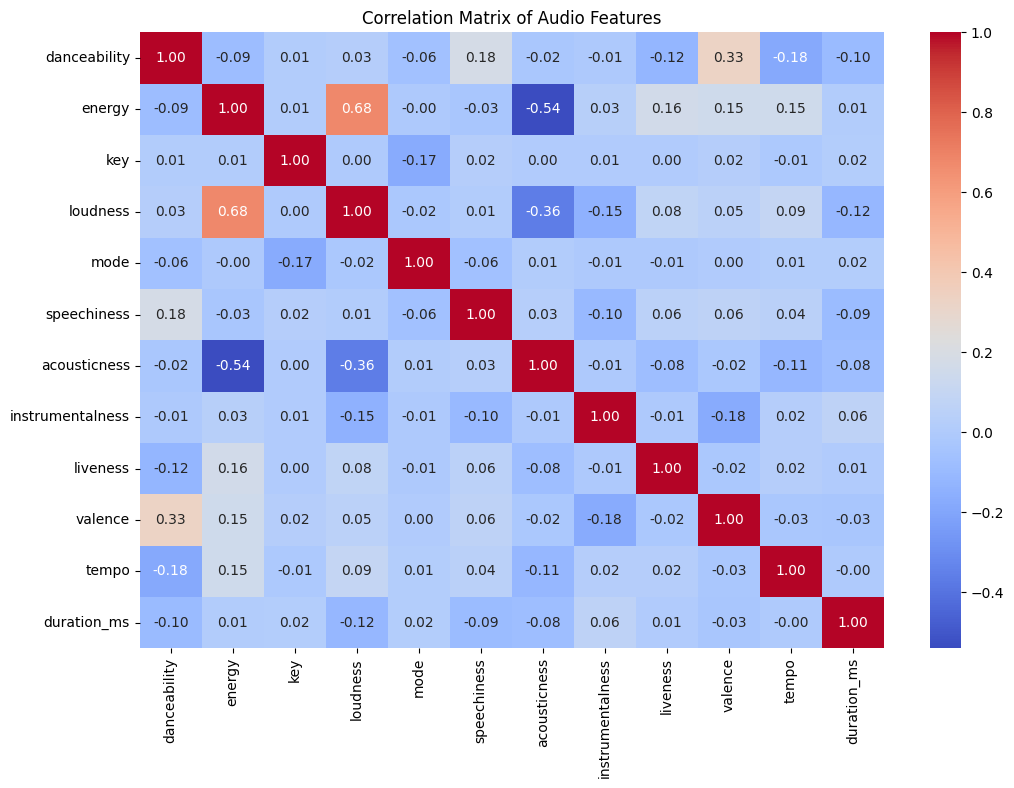

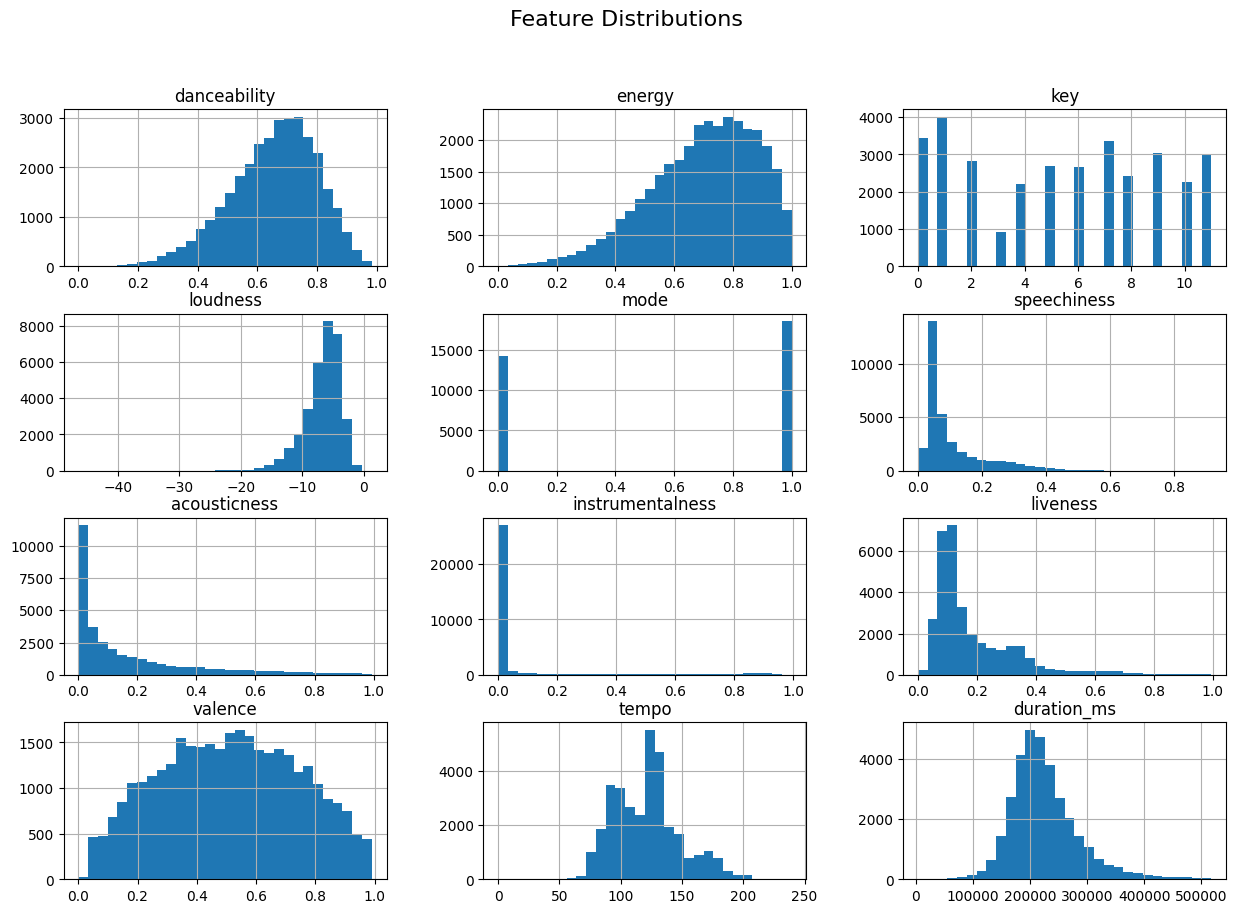

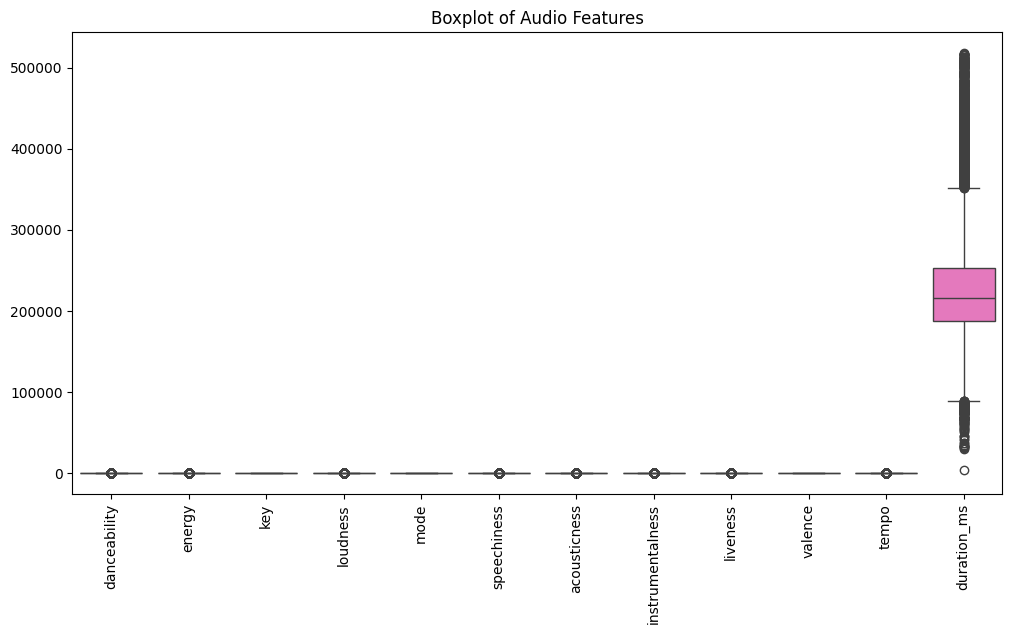

In [7]:
# Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(features.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix of Audio Features")
plt.show()

# Histogram of features
features.hist(bins=30, figsize=(15, 10))
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

# Boxplot for outlier detection
plt.figure(figsize=(12, 6))
sns.boxplot(data=features)
plt.title("Boxplot of Audio Features")
plt.xticks(rotation=90)
plt.show()

Clustering Using KMeans

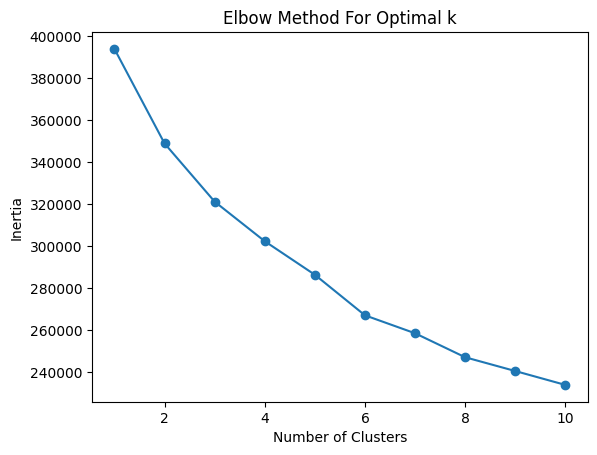

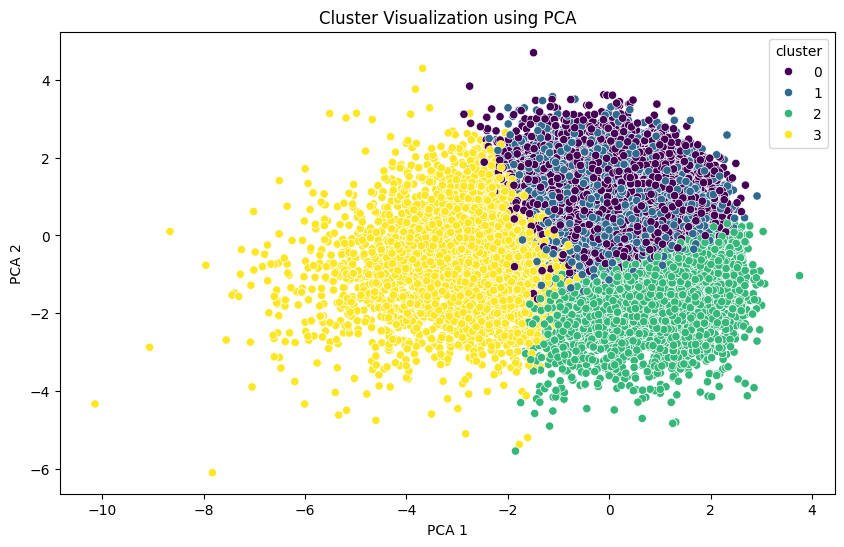

In [9]:
# Determine optimal number of clusters (Elbow Method)
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

# Fit KMeans with optimal number of clusters (example: k=4)
kmeans = KMeans(n_clusters=4, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)

# PCA for 2D visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['cluster'], palette='viridis')
plt.title("Cluster Visualization using PCA")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()

Genre & Playlist-based Clustering

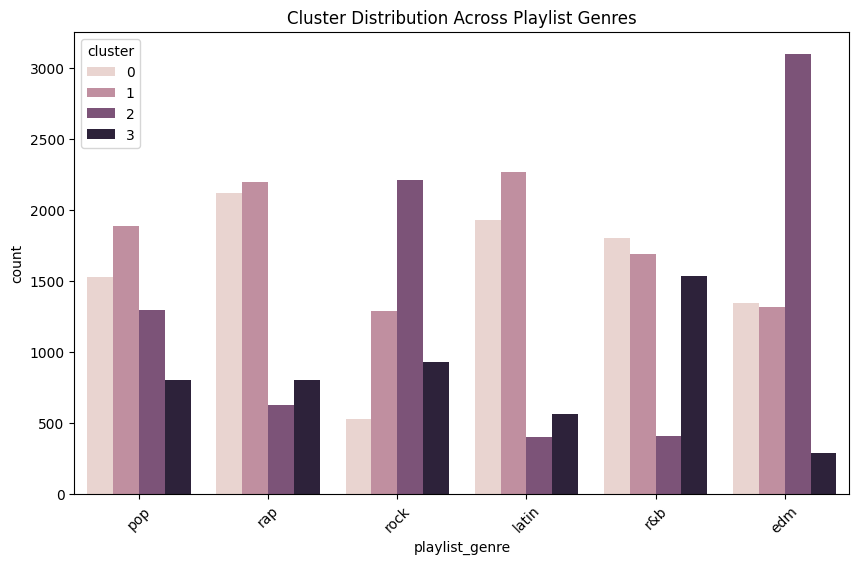

C:\Users\sdine\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


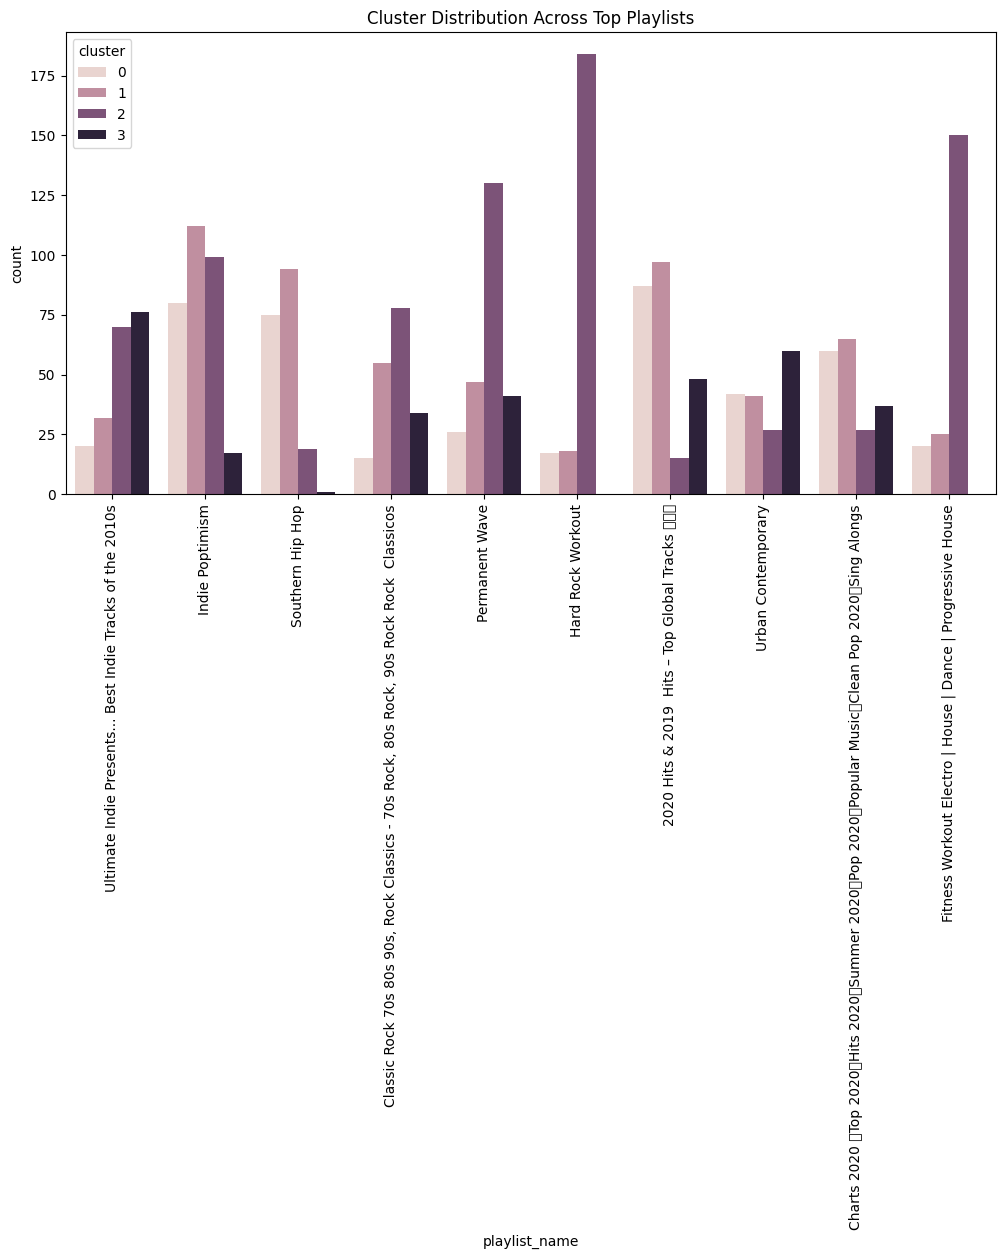

In [11]:
plt.figure(figsize=(10, 6))
sns.countplot(x='playlist_genre', hue='cluster', data=df)
plt.title("Cluster Distribution Across Playlist Genres")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
top_playlists = df['playlist_name'].value_counts().head(10).index
sns.countplot(x='playlist_name', hue='cluster', data=df[df['playlist_name'].isin(top_playlists)])
plt.title("Cluster Distribution Across Top Playlists")
plt.xticks(rotation=90)
plt.show()

Recommendation System

In [13]:
# Use NearestNeighbors to avoid full similarity matrix
nn_model = NearestNeighbors(metric='cosine', algorithm='auto')
nn_model.fit(X_scaled)

def recommend_songs(song_index, n=5):
    distances, indices = nn_model.kneighbors([X_scaled[song_index]], n_neighbors=n+1)
    recommended_indices = indices.flatten()[1:]  # skip the song itself

    columns_to_show = []
    if 'track_name' in df.columns:
        columns_to_show.append('track_name')
    if 'artist_name' in df.columns:
        columns_to_show.append('artist_name')
    if 'playlist_genre' in df.columns:
        columns_to_show.append('playlist_genre')

    return df.iloc[recommended_indices][columns_to_show]

# Example Recommendation
print("Recommended Songs:")
print(recommend_songs(song_index=10, n=5))

Recommended Songs:
                                              track_name playlist_genre
10880                                  Padrinhos Mágicos            rap
18084                                        ¿Y Por Que?          latin
248               Don't Worry Bout Me - Rudimental Remix            pop
17697  Garmi (From "Street Dancer 3D") (feat. Varun D...          latin
14583          Help Our Souls (Urban Contact Radio Edit)           rock
